In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [6]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    
else:
    device = torch.device('cpu')
    
print(device)

cpu


In [9]:
#데이터 준비
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
#데이터준비2
train_dataset = datasets.MNIST(root="Data/mnist",
                               train=True,
                               download=True,
                               transform=transform)

test_dataset = datasets.MNIST(root="Data/mnist",
                               train=False,
                               download=True,
                               transform=transform)

In [11]:
##데이터준비3
train_loder = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=32,
                                          shuffle=True)

test_loder = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=32,
                                          shuffle=True)

In [21]:
for x, y in train_loder:
    print(x.shape, y.shape)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])


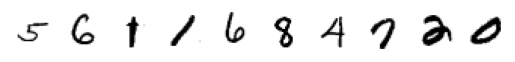

tensor([5, 6, 1, 1, 6, 8, 4, 7, 2, 0])

In [22]:
for idx in range(10):
    plt.subplot(1, 10, idx+1)
    plt.axis("off")
    plt.imshow(x[idx, :, :, :].reshape(28,28), cmap="gray_r")
plt.show()
y[:10]

In [41]:
# 모델구조설계
class MnistNet(nn.Module):
    def __init__(self): # 주로 층을 만듬
        super(MnistNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)


    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.log_softmax(x, dim= 1)
        return x

In [42]:
#학습 도구 구성
model = MnistNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)

MnistNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
)


In [50]:
# 훈련함수 만들기(학습설계)
def train(model, train_loder, optimizer):
    model.train() # train_mode로 설정
    for idx, (images, labels) in enumerate(train_loder):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        if idx % 187 == 0:
            print(f"Batch : {idx}, Loss : {loss.item()}")

In [51]:
for epoch in range(10):
    
    train(model=model, train_loder=train_loder, optimizer=optimizer)
    loss, acc = evaluate(model, test_loder)
    print(f"Epoch : {epoch+1}, Loss: {loss}, Accuracy: {acc}")
    

Batch : 0, Loss : 0.0011544537264853716
Batch : 187, Loss : 0.022551365196704865
Batch : 374, Loss : 0.0002891499607358128
Batch : 561, Loss : 2.241173933725804e-05
Batch : 748, Loss : 0.00022947622346691787
Batch : 935, Loss : 1.1651894965325482e-05
Batch : 1122, Loss : 0.009216167964041233
Batch : 1309, Loss : 1.3626219697471242e-05
Batch : 1496, Loss : 0.0010277233086526394
Batch : 1683, Loss : 0.0015885669272392988
Batch : 1870, Loss : 0.00014778436161577702
Epoch : 1, Loss: 0.10613831483033516, Accuracy: 0.9807
Batch : 0, Loss : 0.015959102660417557
Batch : 187, Loss : 0.00044612918281927705
Batch : 374, Loss : 1.0664172805263661e-05
Batch : 561, Loss : 9.792618220672011e-05
Batch : 748, Loss : 0.024428563192486763
Batch : 935, Loss : 0.0044503300450742245
Batch : 1122, Loss : 5.185397185414331e-06
Batch : 1309, Loss : 0.15825122594833374
Batch : 1496, Loss : 0.0030541308224201202
Batch : 1683, Loss : 0.0007152887992560863
Batch : 1870, Loss : 0.0008609099895693362
Epoch : 2, Loss

In [45]:
def evaluate(model, test_loader):
    loss_total = 0
    correct_total = 0
    model.eval() # 평가모드로 설정 -> batch_normalization, drop_out 수행 중지
    with torch.no_grad(): #가중치 업데이터 수행 중지
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            loss = criterion(output, labels).item()
            loss_total += loss
            predicted_values = output.max(1, keepdim = True)[1]
            correct = predicted_values.eq(labels.view_as(predicted_values)).sum().item()
            correct_total += correct

    loss_total = loss_total / ( len(test_dataset) / 32 )
    # loss_total /= ( len(test_dataset) / 32 )

    accuracy = correct_total / len(test_dataset)

    return loss_total, accuracy

In [52]:
evaluate(model = model, test_loader = test_loder)

(0.16445609623560192, 0.9796)